In [1]:
import sys
sys.version

'3.10.12 (main, Jul  5 2023, 15:34:07) [Clang 14.0.6 ]'

In [2]:
sys.path

['/Users/vatsal/SSDCopy/Projects/LinearRegressionBasic01/notebooks',
 '/Users/vatsal/SSDCopy/Projects',
 '/Users/vatsal/miniconda/envs/Python310/lib/python310.zip',
 '/Users/vatsal/miniconda/envs/Python310/lib/python3.10',
 '/Users/vatsal/miniconda/envs/Python310/lib/python3.10/lib-dynload',
 '',
 '/Users/vatsal/miniconda/envs/Python310/lib/python3.10/site-packages']

## Data Description
The dataset used is the soccer player dataset. It has information about various players from different clubs, and it provides data over ten features with a number of goals as the target variable.

In [3]:
import pandas as pd

In [4]:
soccer_url = "../data/EPL_Soccer_MLR_LR.csv"
soccer_df = pd.read_csv(soccer_url)

In [5]:
soccer_df.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64


In [6]:
soccer_df.columns

Index(['PlayerName', 'Club', 'DistanceCovered(InKms)', 'Goals',
       'MinutestoGoalRatio', 'ShotsPerGame', 'AgentCharges', 'BMI', 'Cost',
       'PreviousClubCost', 'Height', 'Weight', 'Score'],
      dtype='object')

## **Data Dictionary**

* PlayerName : Player Name

* Club : Club of the player
  1. MUN:Manchester United F.C.
  2. CHE: Chelsea F.C.
  3. LIV: Liverpool F.C.

* DistanceCovered(InKms): Average Kms distance covered by the player in each game

* Goals: Average Goals per match

* MinutestoGoalRatio: Minutes 

* ShotsPerGame: Average shots taken per game

* AgentCharges: Agent Fees in h

* BMI: Body-Mass index

* Cost: Cost of each player in hundread thousand dollars

* PreviousClubCost: Previous club cost in hundread thousand dollars

* Height: Height of player in cm

* Weight: Weight of player in kg

* Score: Average score per match

## EDA

In [7]:
soccer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


## 202 Rows, 13 Columns
10 Columns are of type float, 1 is int and 2 other columns are of type object

##### <font color=#4472C4>Mean</font>
###### $$ \bar{x} = \sum_{i=1}^{n}\frac{x_i}{n} $$
##### <font color=#4472C4>Variance</font>
###### $$S^2 = \frac{\sum_{i=1}^{n}(x_i-\bar x)^2}{n-1}$$
##### <font color=#4472C4>Standard Deviation</font>
###### $$S = \sqrt \frac{\sum_{i=1}^{n}(x_i-\bar x)^2}{n-1}$$

In [8]:
soccer_df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


#### <font color=#BFBFBF>Include all the columns in output of describe</font>

In [9]:
soccer_df.describe(include="all")

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202,202,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
unique,198,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,"Rogers, Mr. William John",CHE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,NaN,NaN,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,NaN,NaN,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,NaN,NaN,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,NaN,NaN,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,NaN,NaN,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000


##### <font color=#4472C4>Correlation</font>
##### $$r = \frac{ \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{\sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}$$

In [11]:
soccer_df.corr(numeric_only=True)

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


### Writing a function to output correlation in a different way

In [21]:
def show_corr(df):
    corr = df.corr(numeric_only=True)
    so = corr.unstack().copy()

    so = pd.DataFrame(so)
    so.reset_index(inplace=True)

    so.columns = ["Feature_A","Feature_B","Correlation"]
    so["Type"] = so.Correlation.map(lambda x: "+" if x>=0 else "-")
    so.Correlation = so.Correlation.abs()
    so.sort_values(by="Correlation",ascending=False,inplace=True)

    so.reset_index(inplace=True,drop=True)

    #so = so[so.Correlation != 1]

    so["FeatureComb1"] = so.Feature_A + " - " + so.Feature_B
    so["FeatureComb2"] = so.Feature_B + " - " + so.Feature_A
    so["NextFeature"] = so["FeatureComb2"].shift(-1)
    so = so[(so.FeatureComb1 == so.NextFeature)]

    so.drop(columns=["Feature_A","Feature_B","FeatureComb2","NextFeature"],inplace=True)
    so.reset_index(inplace=True,drop=True)
    so[['FeatureA', 'FeatureB']] = so.FeatureComb1.str.split(" - ",n=1,expand=True)
    so.drop(columns=["FeatureComb1"],inplace=True)
    so = so[["FeatureA","FeatureB","Correlation","Type"]]
    return so

In [28]:
show_corr(soccer_df)[(show_corr(soccer_df)["FeatureA"] == "Score") | (show_corr(soccer_df)["FeatureB"] == "Score")]

,FeatureA,FeatureB,Correlation,Type
0,Cost,Score,0.963017,+
12,MinutestoGoalRatio,Score,0.532449,-
13,ShotsPerGame,Score,0.531522,-
14,Score,DistanceCovered(InKms),0.493512,-
23,PreviousClubCost,Score,0.361850,-
37,Score,Height,0.188022,-
38,BMI,Score,0.187558,+
39,AgentCharges,Score,0.183386,-
50,Score,Goals,0.108114,+
54,Weight,Score,0.000162,-


##### <font color=#BFBFBF>Cost has a very high correlation with Score. </font>
##### <font color=#BFBFBF>The next best correlation is a negative correlation and that is with MinutestoGoalRatio</font>

#### <font color=#BFBFBF>Lets plot a scatter plot for Cost and Score</font>

In [29]:
import matplotlib.pyplot as plt

<Figure size 800x600 with 0 Axes>

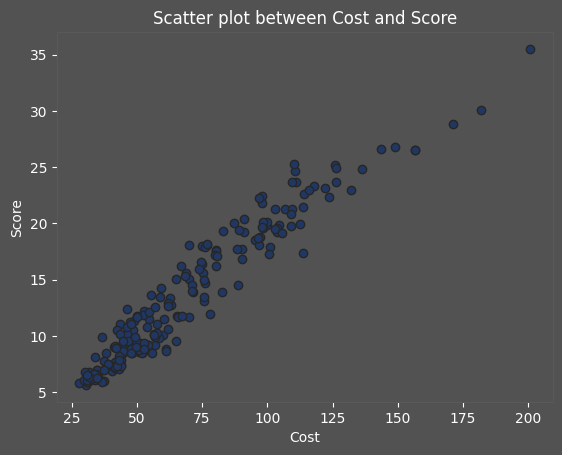

In [44]:
plt.figure(figsize=(8,6))
fig,ax = plt.subplots()
ax.set_facecolor("#525252")
fig.set_facecolor("#525252")
plt.scatter(soccer_df['Cost'], soccer_df['Score'], color="#203764",edgecolors="#262626")
for spine in ax.spines.values():
    spine.set_edgecolor("#595959")
# label
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Scatter plot between Cost and Score")
plt.show()

<Figure size 1200x500 with 0 Axes>

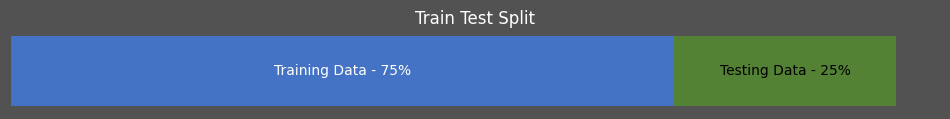

In [64]:
plt.figure(figsize=(12,5))
# Names for the segments
segment_1 = 0.75
segment_2 = 0.25

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(12,1))
bar1 = ax.barh('Segment A', segment_1, color='#4472C4')

bar2 = ax.barh('Segment A', segment_2, left=segment_1, color='#548235')

# Add annotations to each segment
plt.text(segment_1 / 2, 0, f'Training Data - {segment_1 * 100:.0f}%', ha='center', va='center', color='white')
plt.text(segment_1 + segment_2 / 2, 0, f'Testing Data - {segment_2 * 100:.0f}%', ha='center', va='center', color='black')

ax.set_facecolor("#525252")
fig.set_facecolor("#525252")

for spine in ax.spines.values():
    spine.set_edgecolor("#525252")
# Set labels and title
#plt.xlabel('Percentage')
#plt.ylabel('Segments')
plt.title('Train Test Split')
plt.grid(visible=False)
ax.yaxis.set_ticks([])
ax.xaxis.set_ticks([])
# Show the plot
plt.show()

In [65]:
from sklearn.model_selection import train_test_split

In [88]:
x = soccer_df["Cost"].values.reshape(-1, 1)
y = soccer_df["Score"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, test_size=0.25, random_state=100)

In [89]:
x.shape, x_train.shape, x_test.shape

((202, 1), (151, 1), (51, 1))

In [90]:
y.shape, y_train.shape, y_test.shape

((202,), (151,), (51,))

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [93]:
lr = LinearRegression()

lr.fit(x_train,y_train)

y_pred = lr.predict(x_train)

mse = mean_squared_error(y_train, y_pred)

print(f"Mean Squared Error - {mse}")
print(f"R2 - {r2_score(y_train, y_pred)}")
print(f"Coeffecients - {lr.coef_}")
print(f"Intercept - {lr.intercept_}")


Mean Squared Error - 2.845989840078352
R2 - 0.9298932217094917
Coeffecients - [0.18208265]
Intercept - 0.9471853461853179


**Simple Linear Regression**:   $\hat y = \beta_0+\beta_1x+\epsilon$

<Figure size 800x600 with 0 Axes>

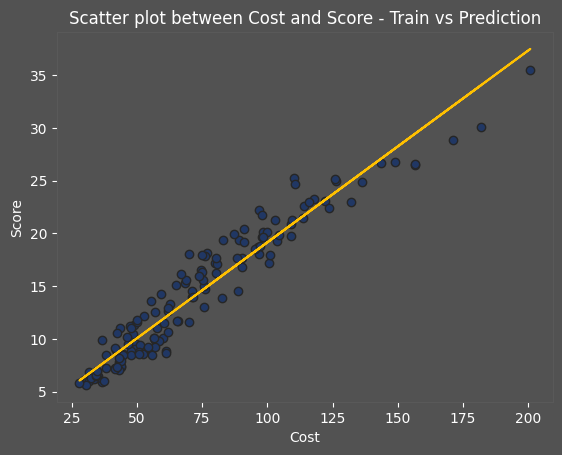

In [94]:
plt.figure(figsize=(8,6))
fig,ax = plt.subplots()
ax.set_facecolor("#525252")
fig.set_facecolor("#525252")
plt.scatter(x_train, y_train, color="#203764",edgecolors="#262626")
plt.plot(x_train, lr.coef_*x_train + lr.intercept_, "#FFC000")
for spine in ax.spines.values():
    spine.set_edgecolor("#595959")
# label
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Scatter plot between Cost and Score - Train vs Prediction")
plt.show()

<Figure size 800x600 with 0 Axes>

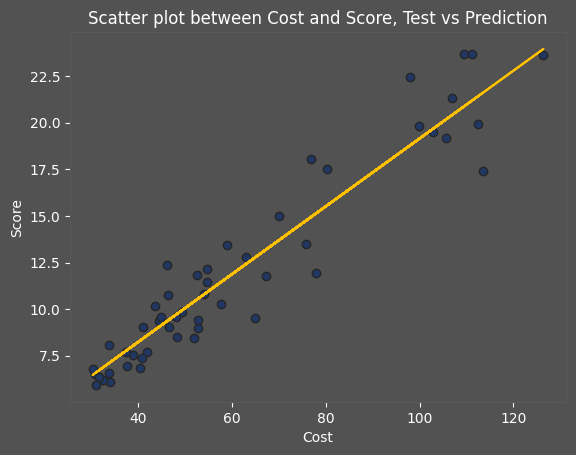

In [95]:
plt.figure(figsize=(8,6))
fig,ax = plt.subplots()
ax.set_facecolor("#525252")
fig.set_facecolor("#525252")
plt.scatter(x_test, y_test, color="#203764",edgecolors="#262626")
plt.plot(x_test, lr.predict(x_test), "#FFC000")
for spine in ax.spines.values():
    spine.set_edgecolor("#595959")
# label
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Scatter plot between Cost and Score, Test vs Prediction")
plt.show()

#### Residuals

<Figure size 800x600 with 0 Axes>

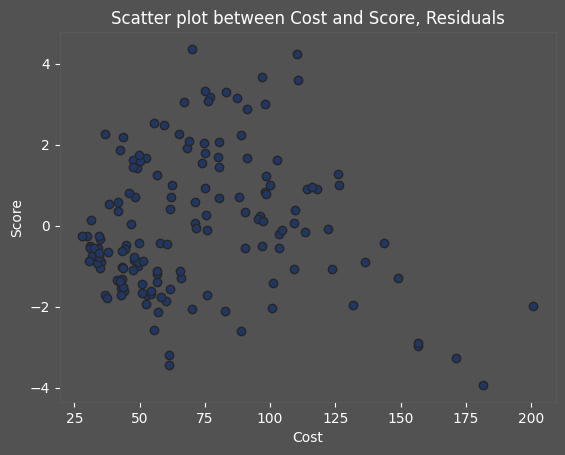

In [96]:
plt.figure(figsize=(8,6))
fig,ax = plt.subplots()
ax.set_facecolor("#525252")
fig.set_facecolor("#525252")
plt.scatter(x_train, y_train - lr.predict(x_train), color="#203764",edgecolors="#262626")

for spine in ax.spines.values():
    spine.set_edgecolor("#595959")
# label
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Scatter plot between Cost and Score, Residuals")
plt.show()

#### Absolute Residuals

In [97]:
import numpy as np

<Figure size 800x600 with 0 Axes>

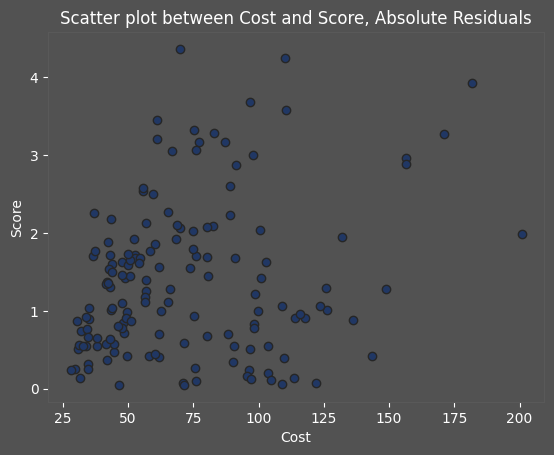

In [98]:
plt.figure(figsize=(8,6))
fig,ax = plt.subplots()
ax.set_facecolor("#525252")
fig.set_facecolor("#525252")
plt.scatter(x_train, np.abs(y_train - lr.predict(x_train)), color="#203764",edgecolors="#262626")

for spine in ax.spines.values():
    spine.set_edgecolor("#595959")
# label
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Scatter plot between Cost and Score, Absolute Residuals")
plt.show()

#### The residuals vs cost plot shows a good scatter of residuals and no pattern is observed up until 125 or 150 costs. We can say we have some heteroscedasticity in the higher costs. We'll see how we can tackle it. 

#### Normality Plot

<Figure size 640x480 with 0 Axes>

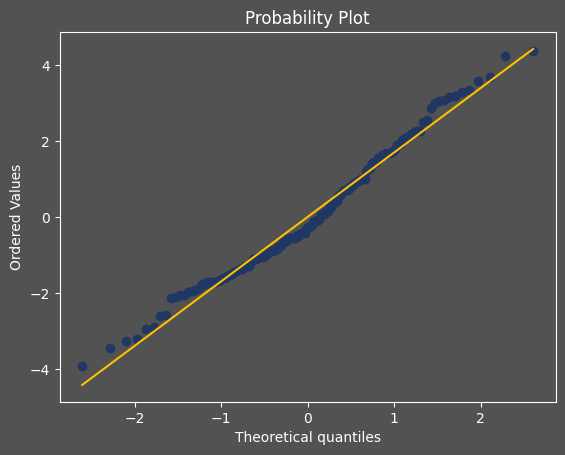

In [135]:
import scipy
#Normality plot
plt.figure(figsize=(8, 6), dpi=80)

fig, ax = plt.subplots()
probplot = scipy.stats.probplot(y_train - lr.predict(x_train),plot=plt)

plt.gcf().set_facecolor("#525252")
ax.get_lines()[0].set_markerfacecolor("#203764")
ax.get_lines()[0].set_markeredgecolor("#203764")
ax.get_lines()[1].set_color("#FFC000")
ax.set_facecolor("#525252")


plt.show()

In [101]:
import seaborn as sns

<Figure size 800x600 with 0 Axes>

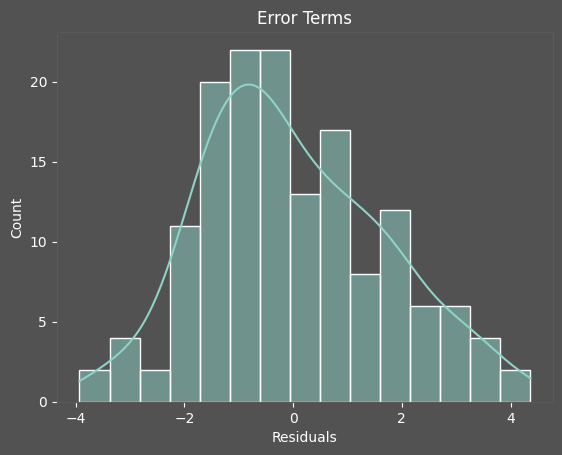

In [109]:
plt.figure(figsize=(8,6))
fig,ax = plt.subplots()
ax.set_facecolor("#525252")
fig.set_facecolor("#525252")
sns.histplot(y_train - lr.predict(x_train), kde=True,bins=15)
#plt.scatter(x_train, np.abs(y_train - lr.predict(x_train)), color="#203764",edgecolors="#262626")

for spine in ax.spines.values():
    spine.set_edgecolor("#595959")
# label
plt.xlabel("Residuals")
#plt.ylabel("Residuals")
plt.title("Error Terms")
plt.show()

#### The normality of the errors can be seen in the normal probability plot and the histogram. It is more or less normal or bell shaped.

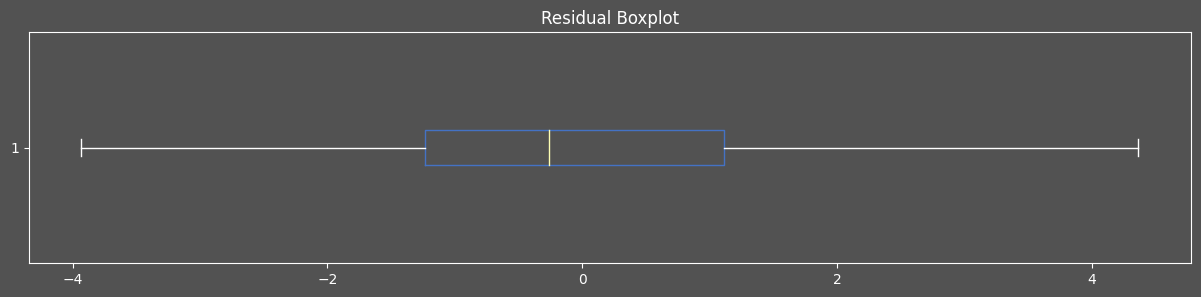

In [146]:

fig,ax = plt.subplots()
fig.set_size_inches(15, 3)

ax.set_facecolor("#525252")
fig.set_facecolor("#525252")

plt.boxplot(y_train - lr.predict(x_train), boxprops=dict(color='#4472C4'),vert=False)

plt.title('Residual Boxplot')
plt.show()

##### The residual boxplot shows no obvious outliers.

### Non-Constant Variance

<Figure size 800x600 with 0 Axes>

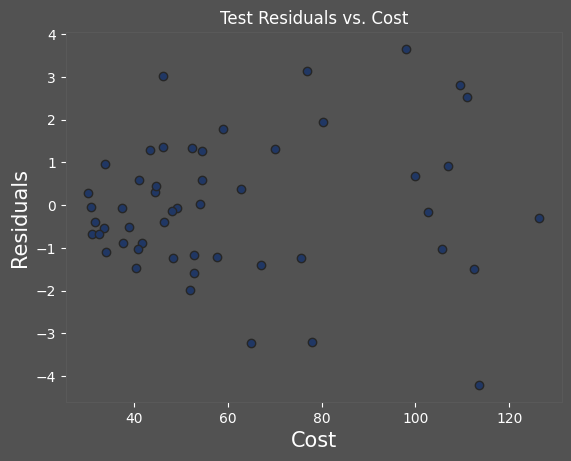

In [149]:
test_residuals=(y_test-lr.predict(x_test))
len(y_test)
len(lr.predict(x_test))
len(test_residuals)

#Residuals vs. predictor in test set
plt.figure(figsize=(8, 6))
fig,ax = plt.subplots()
ax.set_facecolor("#525252")
fig.set_facecolor("#525252")

plt.title('Test Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.ylabel('Residuals',fontsize=15)
plt.scatter(x_test, test_residuals, color="#203764",edgecolors="#262626")

for spine in ax.spines.values():
    spine.set_edgecolor("#595959")
plt.show()

##### There is some evidence of Heteroscedacity. The scatter of data points increases as we increase the Cost.

#### Lets try some transformations

<Figure size 640x480 with 0 Axes>

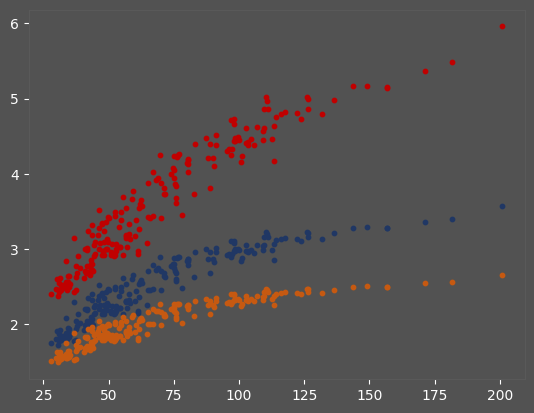

In [157]:
#Try sqrt
sqrt_y=np.sqrt(y)
plt.figure(figsize=(8, 6), dpi=80)

fig,ax = plt.subplots()
ax.set_facecolor("#525252")
fig.set_facecolor("#525252")

plt.scatter(x, sqrt_y,color='#C00000', s=10)

#Try ln
ln_y=np.log(y)
plt.scatter(x, ln_y,color='#203764', s=10)


#Let's try a BC transformation

#Box Cox procedure on all cost
bc_y=list(scipy.stats.boxcox(y))
bc_y=bc_y[0]
plt.scatter(x, bc_y,color='#C65911', s=10)

for spine in ax.spines.values():
    spine.set_edgecolor("#595959")

plt.show()

##### Overall, most satisfied with the sqrt transformation

In [158]:
x_train, x_test, y_train, y_test = train_test_split(x, sqrt_y, train_size=0.75, test_size=0.25, random_state=100)
lr = LinearRegression()

lr.fit(x_train,y_train)

y_pred = lr.predict(x_train)

mse = mean_squared_error(y_train, y_pred)

print(f"Mean Squared Error - {mse}")
print(f"R2 - {r2_score(y_train, y_pred)}")
print(f"Coeffecients - {lr.coef_}")
print(f"Intercept - {lr.intercept_}")


Mean Squared Error - 0.07352964179661187
R2 - 0.8947701578067445
Coeffecients - [0.02343327]
Intercept - 1.9673671907215442


<Figure size 800x600 with 0 Axes>

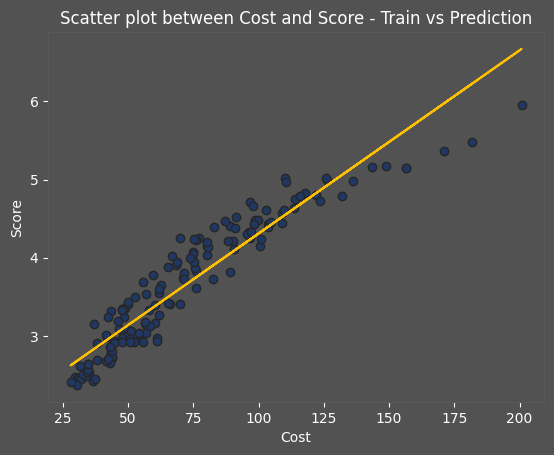

In [159]:
plt.figure(figsize=(8,6))
fig,ax = plt.subplots()
ax.set_facecolor("#525252")
fig.set_facecolor("#525252")
plt.scatter(x_train, y_train, color="#203764",edgecolors="#262626")
plt.plot(x_train, lr.coef_*x_train + lr.intercept_, "#FFC000")
for spine in ax.spines.values():
    spine.set_edgecolor("#595959")
# label
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Scatter plot between Cost and Score - Train vs Prediction")
plt.show()

<Figure size 800x600 with 0 Axes>

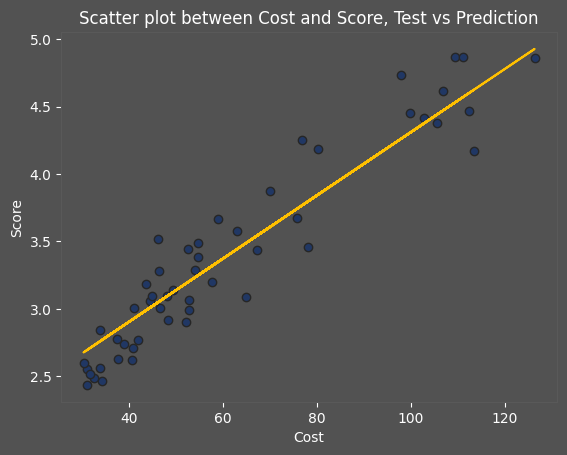

In [160]:
plt.figure(figsize=(8,6))
fig,ax = plt.subplots()
ax.set_facecolor("#525252")
fig.set_facecolor("#525252")
plt.scatter(x_test, y_test, color="#203764",edgecolors="#262626")
plt.plot(x_test, lr.predict(x_test), "#FFC000")
for spine in ax.spines.values():
    spine.set_edgecolor("#595959")
# label
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Scatter plot between Cost and Score, Test vs Prediction")
plt.show()

<Figure size 800x600 with 0 Axes>

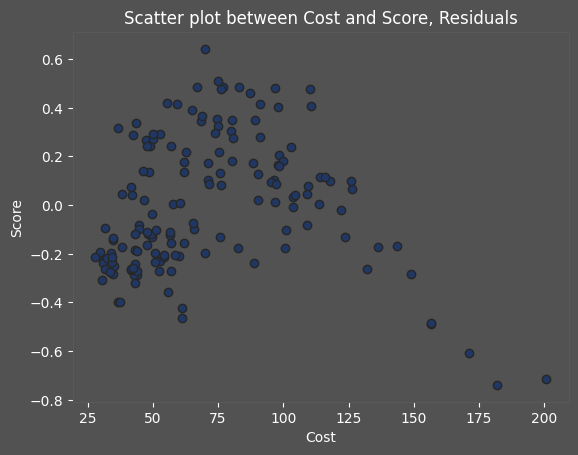

In [161]:
plt.figure(figsize=(8,6))
fig,ax = plt.subplots()
ax.set_facecolor("#525252")
fig.set_facecolor("#525252")
plt.scatter(x_train, y_train - lr.predict(x_train), color="#203764",edgecolors="#262626")

for spine in ax.spines.values():
    spine.set_edgecolor("#595959")
# label
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Scatter plot between Cost and Score, Residuals")
plt.show()

##### Here's the same exercise but for the test dataset. Observe that the range of test data is within the train data and the maximum cost is 120, hence the regression line fits in the best way possible.